 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data-1.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [49]:
tech_supp_df.shape

(23, 8)

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [50]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [51]:
from scipy.stats import zscore

numeric_cols = tech_supp_df.drop("PROBLEM_TYPE",axis=1)

prob_type = tech_supp_df.pop("PROBLEM_TYPE")   # permanently drops

numeric_cols = numeric_cols.apply(zscore)       #scalling is done

tech_supp_df = numeric_cols.join(prob_type)

tech_supp_df.head()


,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


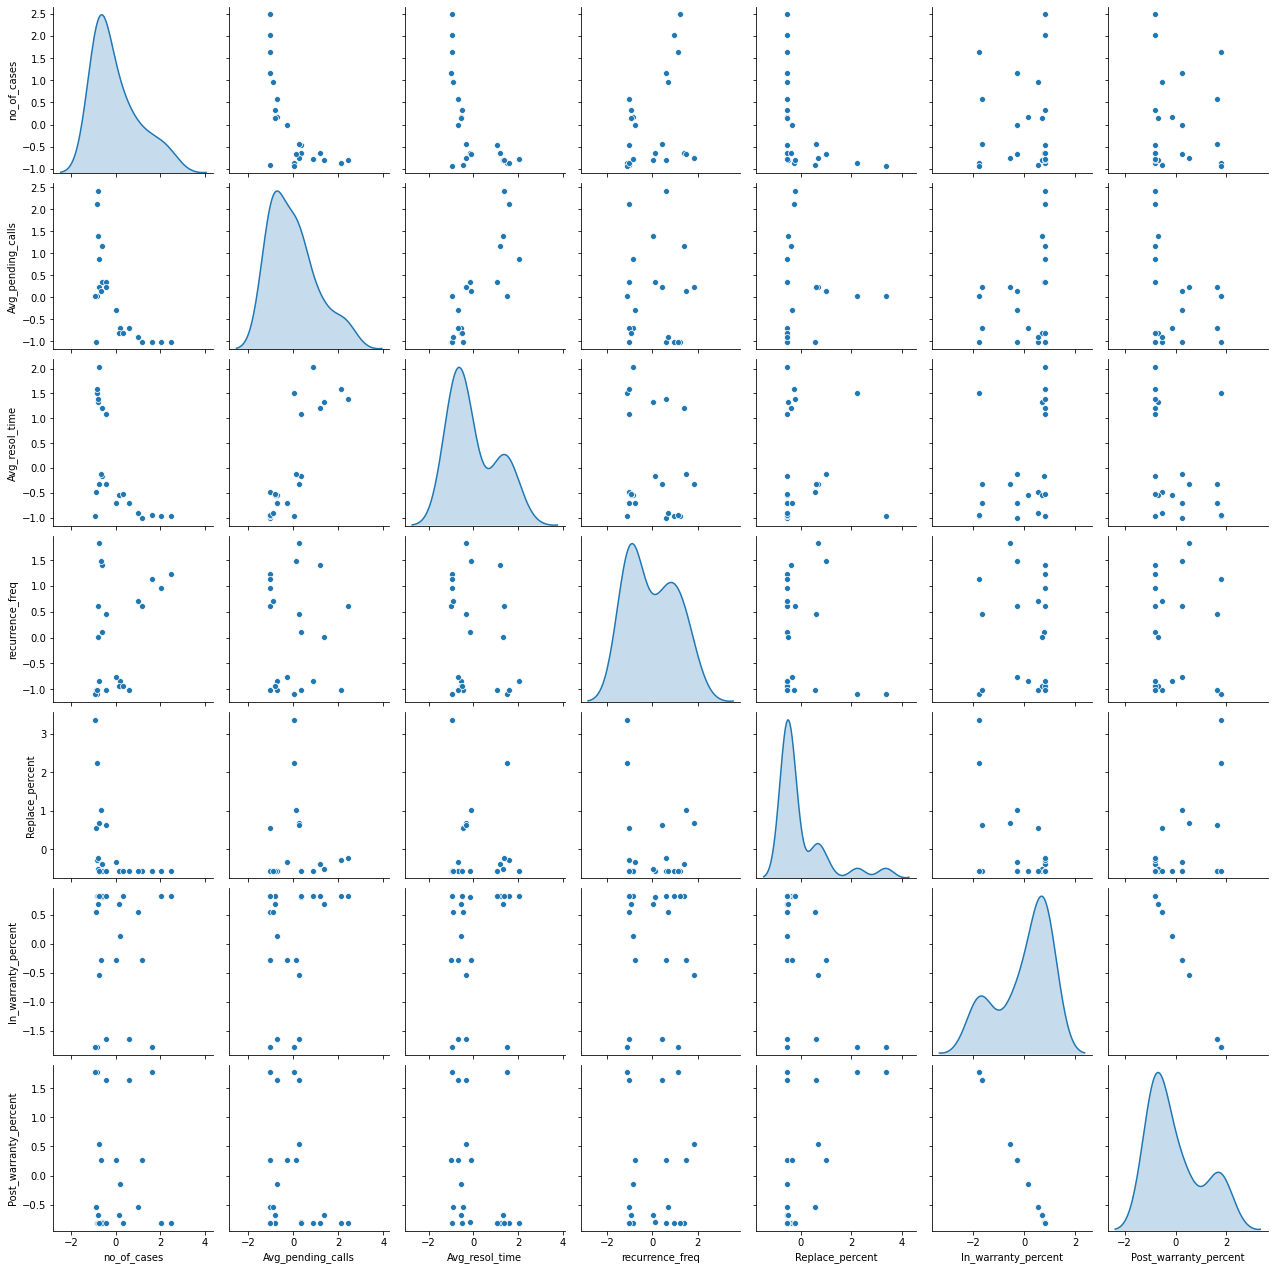

In [15]:
import seaborn as sns
sns.pairplot(numeric_cols,diag_kind='kde')

### The two small peaks of "Replacement_percent" cannot be trusted. Mostly we can see two distinct peaks. Only in case of "Avg_pending calls", we see three peaks.

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5,1,'Selecting k with the Elbow Method')

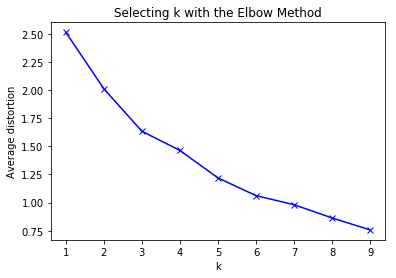

In [52]:
tech_supp_attributes = tech_supp_df.drop("PROBLEM_TYPE",axis=1)
#Finding optimal no. of clusters

from scipy.spatial.distance import cdist
clusters=range(1,10)              # check k values in range 0-10     
mean_dist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_supp_attributes)
    prediction=model.predict(tech_supp_attributes)
    mean_dist.append(sum(np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / tech_supp_attributes.shape[0])


plt.plot(clusters, mean_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 3 clusters

In [53]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]
tech_supp_df.head()

Groups Assigned : 



,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE,GROUP
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working,0
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working,0
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FEC96C2E8>,
      dtype=object)

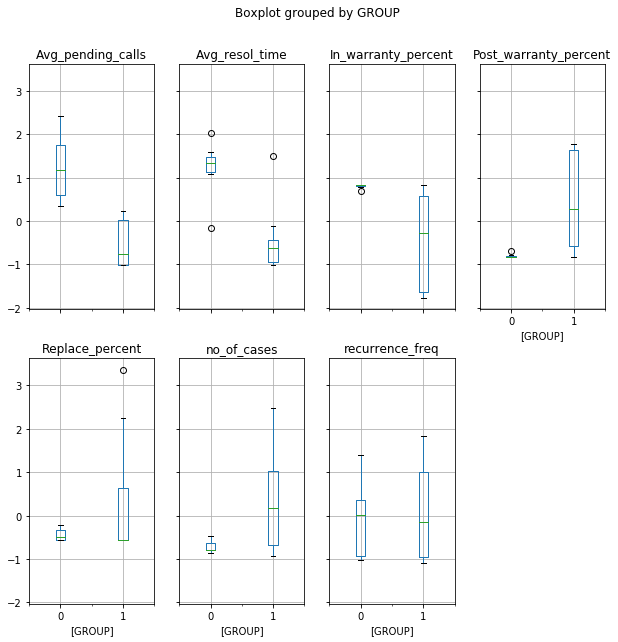

In [25]:
tech_supp_df.boxplot(by='GROUP',layout=(2,4),figsize=(10,10))

Analyze the distribution of the data among the two groups (K = 2). One of the most informative visual tool is boxplot.


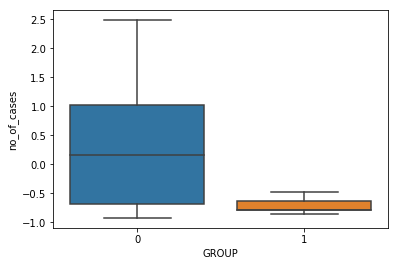

In [54]:
import seaborn as sns
plt.cla()          # Clear current axes


#plt.boxplot([tech_supp_df["no_of_cases"]])

#plt.boxplot([[tech_supp_df["no_of_cases"][tech_supp_df.GROUP==0]],[tech_supp_df["no_of_cases"][tech_supp_df.GROUP==1]]])

#plt.boxplot([tech_supp_df["no_of_cases"][tech_supp_df.GROUP==0]],
             #[tech_supp_df["no_of_cases"][tech_supp_df.GROUP==1]] )
            #labels=('GROUP 1','GROUP 2'))
ax = sns.boxplot(x="GROUP", y="no_of_cases", data=tech_supp_df)

### The K = 2 boxplot clearly shows outliers in group 1. Indicating that the 1st group is stretched
### indicating probability of another cluster. Let us try with K = 3, the next elbow point

In [55]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]
tech_supp_df.info

Groups Assigned : 



<bound method DataFrame.info of     no_of_cases  Avg_pending_calls  Avg_resol_time  recurrence_freq  \
0      0.179429          -0.701207       -0.538351        -0.843188   
1     -0.862176           0.027143        1.510857        -1.101765   
2     -0.908323          -1.013357       -0.486253        -1.015573   
3     -0.921508           0.027143       -0.955140        -1.101765   
4     -0.644625           0.339294       -0.156296         0.104930   
5     -0.631441           1.171694        1.198266         1.397818   
6     -0.862176           2.108144        1.580322        -1.015573   
7      0.146467          -0.805257       -0.538351        -0.929380   
8      1.174886          -1.013357       -1.007238         0.622085   
9     -0.796251           1.379794        1.337195         0.018738   
10    -0.789659           2.420294        1.389294         0.622085   
11     0.574975          -0.701207       -0.694647        -1.015573   
12     0.331055          -0.805257       -0.5

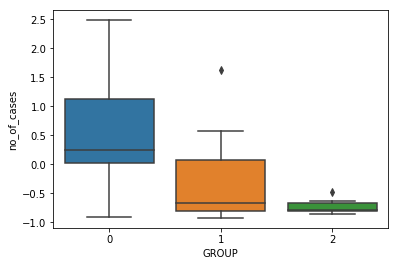

In [56]:
plt.cla()

ax = sns.boxplot(x="GROUP", y="no_of_cases", data=tech_supp_df)


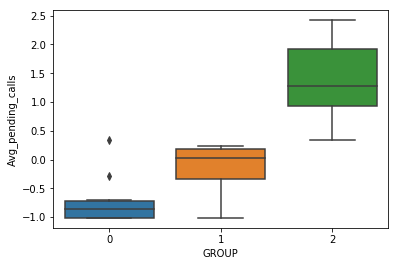

In [57]:
ax = sns.boxplot(x="GROUP", y="Avg_pending_calls", data=tech_supp_df)

In [0]:
#Analyzing in terms of k = 3 seems to give a better segregation of the technical support tickets than K=2. 
#The boxes are tighter indicating the spread of data is much less in K = 3 than in K = 2 and there are no outliers!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FEF1AEDA0>,
      dtype=object)

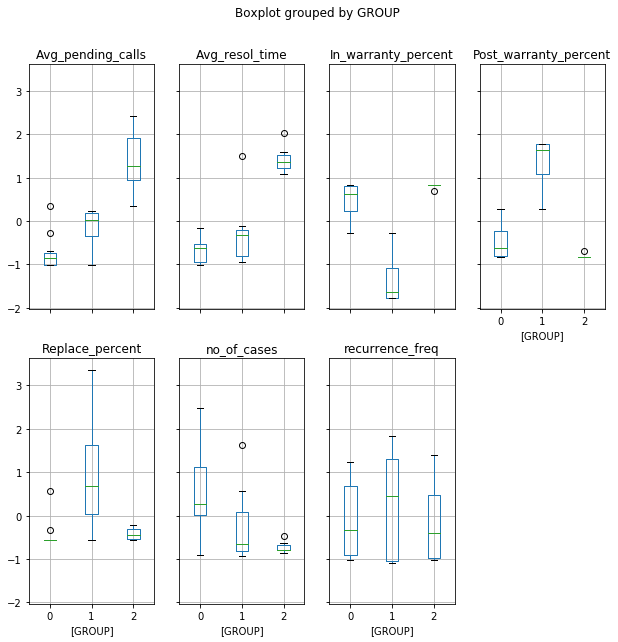

In [59]:
# That we have 3 clusters to work with, let us boxplot on Avg_resol_time in days
#plt.cla()

tech_supp_df.boxplot(by='GROUP',layout=(2,4),figsize=(10,10))

From the box plot it is clear that technical issues belonging to group 2 and 3 take much less time to resolve and hence not so many pending calls even though they are them most frequently occuring tech support issues (box plot 1) 

The group 2 and 3 may be most frequently reported issues and take less time to resolve but then do they re-occur i.e. same person reports those issues multiple times and hence the count is high (box plot 1)?

In [0]:
# Average resolution time distribution across the three clusters reflects the same information as avg pending cases.

# In view of this analysis, one can think of providing self help facilities to the customer for group 2 and group 3 issues
# Even a chat facility or helpline number may bring down these issues and also customer is likely to feel good
# with immediate help and resolution.
# One may even consider automating the ticket resolutions....
